# 1. Importing Required Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler

# 1. Read the Dataset

In [2]:

df = pd.read_csv(r"C:\Users\SANATH\OneDrive\Desktop\fifa.csv")
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# 2.Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [4]:
df.shape

(18207, 60)

In [5]:
df.nunique()

ID                          18207
Name                        17194
Age                            29
Photo                       18207
Nationality                   164
Flag                          164
Overall                        48
Potential                      47
Club                          651
Club Logo                     679
Value                         217
Wage                          144
Preferred Foot                  2
International Reputation        5
Weak Foot                       5
Skill Moves                     5
Work Rate                       9
Body Type                      10
Position                       27
Jersey Number                  99
Joined                       1736
Loaned From                   341
Contract Valid Until           36
Height                         21
Weight                         57
Crossing                       89
Finishing                      93
HeadingAccuracy                91
ShortPassing                   85
Volleys       

In [6]:
df.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


# 3. Drop redundant Columns

In [7]:

df.drop(columns=['Photo', 'Flag', 'Club Logo'],inplace=True)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# 4. getting rid of currency values

In [8]:

df['Value'] = df['Value'].str.replace('€','')
df["Wage"] = df['Value'].str.replace('€','')
df['Release Clause'] = df['Value'].str.replace('€','')

In [9]:
# 4. replacing null values in release clause column with 0
df['Release Clause'].fillna(0)

0        110.5M
1           77M
2        118.5M
3           72M
4          102M
          ...  
18202       60K
18203       60K
18204       60K
18205       60K
18206       60K
Name: Release Clause, Length: 18207, dtype: object

In [10]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [ ]:
# 4. converting and multiplying M with 1000000 and k with 1000

In [11]:

def convert_currency_to_float(value_str):
    if value_str[-1] == 'M':
        return float(value_str[0:-1]) * 1000000
    elif value_str[-1] == 'K':
        return float(value_str[0:-1]) * 1000
    else:
        return float(value_str[0:])

In [12]:
columns_to_convert = ["Value", "Wage", "Release Clause"]
for col in columns_to_convert:
    df[col] = df[col].apply(convert_currency_to_float)

In [13]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,110500000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,77000000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,118500000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,72000000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,102000000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,60000.0,Right,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,60000.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,60000.0,Right,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,60000.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60000.0,60000.0,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,60000.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,60000.0,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,60000.0


# 5. Convert the column "Joined" into integer data type with keeping only the year.


In [15]:
df['Joined'] = pd.to_datetime(df['Joined'])

In [16]:
df['Joined'] = df['Joined'].dt.year

In [17]:
df['Joined']

0        2004.0
1        2018.0
2        2017.0
3        2011.0
4        2015.0
          ...  
18202    2017.0
18203    2018.0
18204    2017.0
18205    2018.0
18206    2018.0
Name: Joined, Length: 18207, dtype: float64

# 6. Convert the column "Contract Valid Until" to pandas datetime type.

In [19]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [20]:
df['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

# 7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points.


In [22]:
df['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [23]:
def convert_height(height_str):
    try:
        feet, inches = height_str.split("'")
        total_feet = int(feet) + int(inches)/12.0
        return total_feet
    except:
        return None

In [24]:
df['Height'] = df['Height'].apply(convert_height)

In [25]:
df = df.dropna(subset=['Height'])

In [26]:
df['Height'].head()

0    5.583333
1    6.166667
2    5.750000
3    6.333333
4    5.916667
Name: Height, dtype: float64

# 8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float.

In [27]:

df['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [28]:
def convert_weight_to_float(weight_str):
    return float(weight_str.strip('lbs'))

In [29]:
df['Weight'] = df['Weight'].apply(convert_weight_to_float)

In [30]:
df['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

# 9. Check for the percentage of missing values and impute them with appropriate imputation techniques


In [32]:
missing_values = df.isnull().sum() / len(df) * 100

In [33]:
print("Percentage of missing values is: ")
print(missing_values)

Percentage of missing values is: 
ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.327166
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.000000
International Reputation     0.000000
Weak Foot                    0.000000
Skill Moves                  0.000000
Work Rate                    0.000000
Body Type                    0.000000
Position                     0.066083
Jersey Number                0.066083
Joined                       8.287901
Loaned From                 93.039264
Contract Valid Until         1.327166
Height                       0.000000
Weight                       0.000000
Crossing                     0.000000
Finishing                    0.000000
HeadingAccuracy              0.000000
ShortPassing    

In [34]:
df['Club'].head()
    

0           FC Barcelona
1               Juventus
2    Paris Saint-Germain
3      Manchester United
4        Manchester City
Name: Club, dtype: object

In [35]:
df['Position'].fillna("Unknown", inplace=True)

In [36]:
df['Club'].fillna("Unknown", inplace=True)

In [37]:

df['Jersey Number'].fillna("Unknown", inplace=True)
df['Joined'].fillna("Unknown", inplace=True)
df['Loaned From'].fillna("Unknown", inplace=True)
df['Contract Valid Until'].fillna("Unknown", inplace=True)

In [38]:
print("DataFrame after imputation: ")
print(df)

DataFrame after imputation: 
           ID                Name  Age Nationality  Overall  Potential  \
0      158023            L. Messi   31   Argentina       94         94   
1       20801   Cristiano Ronaldo   33    Portugal       94         94   
2      190871           Neymar Jr   26      Brazil       92         93   
3      193080              De Gea   27       Spain       91         93   
4      192985        K. De Bruyne   27     Belgium       91         92   
...       ...                 ...  ...         ...      ...        ...   
18202  238813        J. Lundstram   19     England       47         65   
18203  243165  N. Christoffersson   19      Sweden       47         63   
18204  241638           B. Worman   16     England       47         67   
18205  246268      D. Walker-Rice   17     England       47         66   
18206  246269           G. Nugent   16     England       46         66   

                      Club        Value         Wage Preferred Foot  ...  \
0     

# EXPLORATORY DATA ANALYSIS

# 10. Distribution of Overall rating for all the players and write your findings

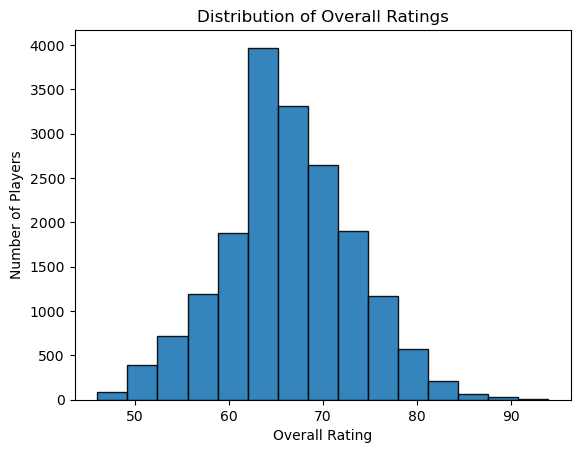

In [41]:
plt.hist(df['Overall'], bins=15, edgecolor='black', alpha=0.9)
plt.title("Distribution of Overall Ratings")
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.show()

> Highest number of players are rated from 60 to 70 percentage.
> very less number of players are rated above 90 percentage.

# 11. Retrieve the names of top20 players based on the Overall rating

In [43]:
top_20_players = df.sort_values(by='Overall', ascending=False).head(20)
top_20_names = top_20_players['Name'].tolist()

In [44]:
print("Top 20 players based on Overall rating:")
print(top_20_names)

Top 20 players based on Overall rating:
['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'De Gea', 'K. De Bruyne', 'E. Hazard', 'L. Modrić', 'L. Suárez', 'Sergio Ramos', 'D. Godín', 'David Silva', 'J. Oblak', 'T. Kroos', 'R. Lewandowski', 'Sergio Busquets', 'G. Chiellini', 'S. Agüero', 'M. Neuer', 'E. Cavani', 'H. Kane']


# 12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating

In [46]:
top_20_players = df.sort_values(by='Overall', ascending=False).head(20)
top_20_players_info = df[df['Name'].isin(top_20_players['Name'])]

In [47]:
print("DataFrame with information of Top 20 players:")
print(top_20_players_info)

DataFrame with information of Top 20 players:
           ID               Name  Age Nationality  Overall  Potential  \
0      158023           L. Messi   31   Argentina       94         94   
1       20801  Cristiano Ronaldo   33    Portugal       94         94   
2      190871          Neymar Jr   26      Brazil       92         93   
3      193080             De Gea   27       Spain       91         93   
4      192985       K. De Bruyne   27     Belgium       91         92   
5      183277          E. Hazard   27     Belgium       91         91   
6      177003          L. Modrić   32     Croatia       91         91   
7      176580          L. Suárez   31     Uruguay       91         91   
8      155862       Sergio Ramos   32       Spain       91         91   
9      200389           J. Oblak   25    Slovenia       90         93   
10     188545     R. Lewandowski   29      Poland       90         90   
11     182521           T. Kroos   28     Germany       90         90   
12   

# 13.  What is the average "Age" and "Wage" of these top 20 players using above df

In [49]:
top_20_players_info = df[df['Name'].isin(top_20_players['Name'])]

In [50]:
average_age = top_20_players_info['Age'].mean()
average_wage = top_20_players_info['Wage'].mean()

In [51]:
print("Average Age of the top 20 players:", average_age)
print("Average Wage of the top 20 players:", average_wage)

Average Age of the top 20 players: 28.347826086956523
Average Wage of the top 20 players: 62043478.26086956


# 14. Top 20 players based on the Overall rating, which player has the highest wage

In [53]:
highest_wage_player = top_20_players_info[top_20_players_info['Wage'] == top_20_players_info['Wage'].max()]

In [54]:
print("Player with the highest wage among the top 20 players:")
print("Name:", highest_wage_player['Name'])

Player with the highest wage among the top 20 players:
Name: 2    Neymar Jr
Name: Name, dtype: object


# 15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'.

In [81]:
df_new = ["Name", "Club", "Wage", "Overall"]
df_new1 = df.loc[:, df_new].copy()
df_new1

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,110500000.0,94
1,Cristiano Ronaldo,Juventus,77000000.0,94
2,Neymar Jr,Paris Saint-Germain,118500000.0,92
3,De Gea,Manchester United,72000000.0,91
4,K. De Bruyne,Manchester City,102000000.0,91
...,...,...,...,...
18202,J. Lundstram,Crewe Alexandra,60000.0,47
18203,N. Christoffersson,Trelleborgs FF,60000.0,47
18204,B. Worman,Cambridge United,60000.0,47
18205,D. Walker-Rice,Tranmere Rovers,60000.0,47


In [57]:
# 15. i.
avg_ratings = df.groupby("Club")["Overall"].mean()
print("Average Overall rating for each club: ")
print(avg_ratings)

Average Overall rating for each club: 
Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.208333
Name: Overall, Length: 652, dtype: float64


In [58]:
# 15. ii.
avg_ratings_df = avg_ratings.reset_index()
print(avg_ratings)

Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.208333
Name: Overall, Length: 652, dtype: float64


In [59]:
top10_clubs = avg_ratings_df.nlargest(10, "Overall")

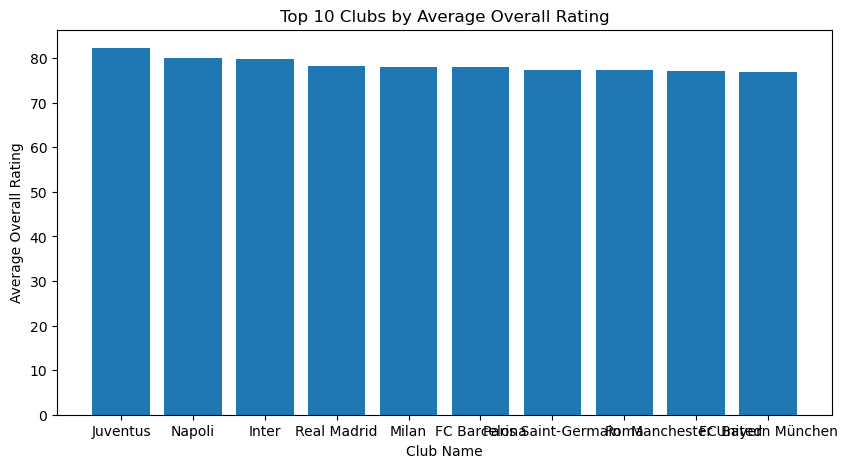

In [60]:
plt.figure(figsize=(10, 5))
plt.bar(top10_clubs["Club"], top10_clubs["Overall"])
plt.xlabel("Club Name")
plt.ylabel("Average Overall Rating")
plt.title("Top 10 Clubs by Average Overall Rating")
plt.show()

# 16 What is the relationship between age and individual potential of the player


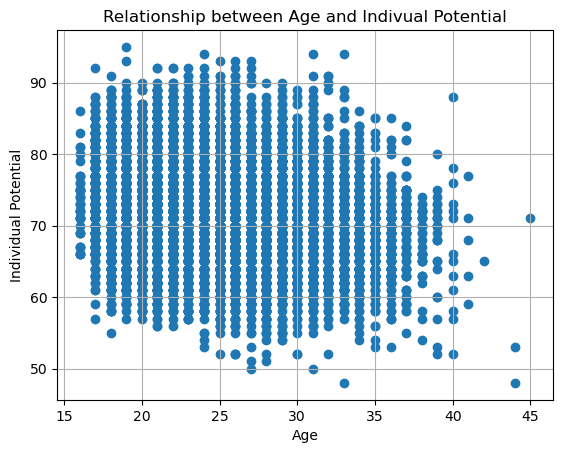

In [62]:
plt.scatter(df["Age"], df["Potential"])
plt.xlabel("Age")
plt.ylabel("Individual Potential")
plt.title("Relationship between Age and Indivual Potential")
plt.grid(True)
plt.show()

> Highest potential is seen in players younger than 20 years of old.
> Players below the age of 35 displayed overall potential greater than 90.
> After the age 35, we can clearly see dip in individual potential of the players.

# 17.  Features directly contribute to the wages of the players using potential, Overall, value, international reputation, and Release Clause.

In [64]:
df_cor = ["Wage", "Potential", "Overall", "Value", "International Reputation", "Release Clause"]

In [65]:
dfnew_cor = df.loc[:, df_cor].copy()

In [66]:
correlation_matrix = dfnew_cor.corr()

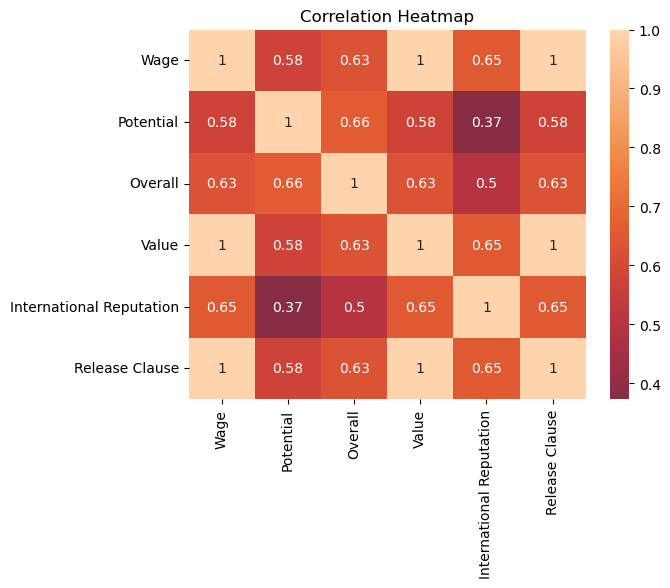

In [67]:
sns.heatmap(correlation_matrix, annot=True, center=0)
plt.title("Correlation Heatmap")
plt.show()

# 18.  Position in the pitch where the maximum number of players play and the position where the minimum number of players play

In [68]:
p_df = df.groupby('Position')['Position'].count().sort_values(ascending=False)
p_df

Position
ST         2152
GK         2025
CB         1778
CM         1394
LB         1322
RB         1291
RM         1124
LM         1095
CAM         958
CDM         948
RCB         662
LCB         648
LCM         395
RCM         391
LW          381
RW          370
RDM         248
LDM         243
LS          207
RS          203
RWB          87
LWB          78
CF           74
RAM          21
LAM          21
RF           16
LF           15
Unknown      12
Name: Position, dtype: int64

In [72]:
list = p_df.index.tolist()

print('Pitch position of Max Number of Player : ', list[0])
print('Pitch position of Min Number of Player : ',list[-2])

Pitch position of Max Number of Player :  ST
Pitch position of Min Number of Player :  LF


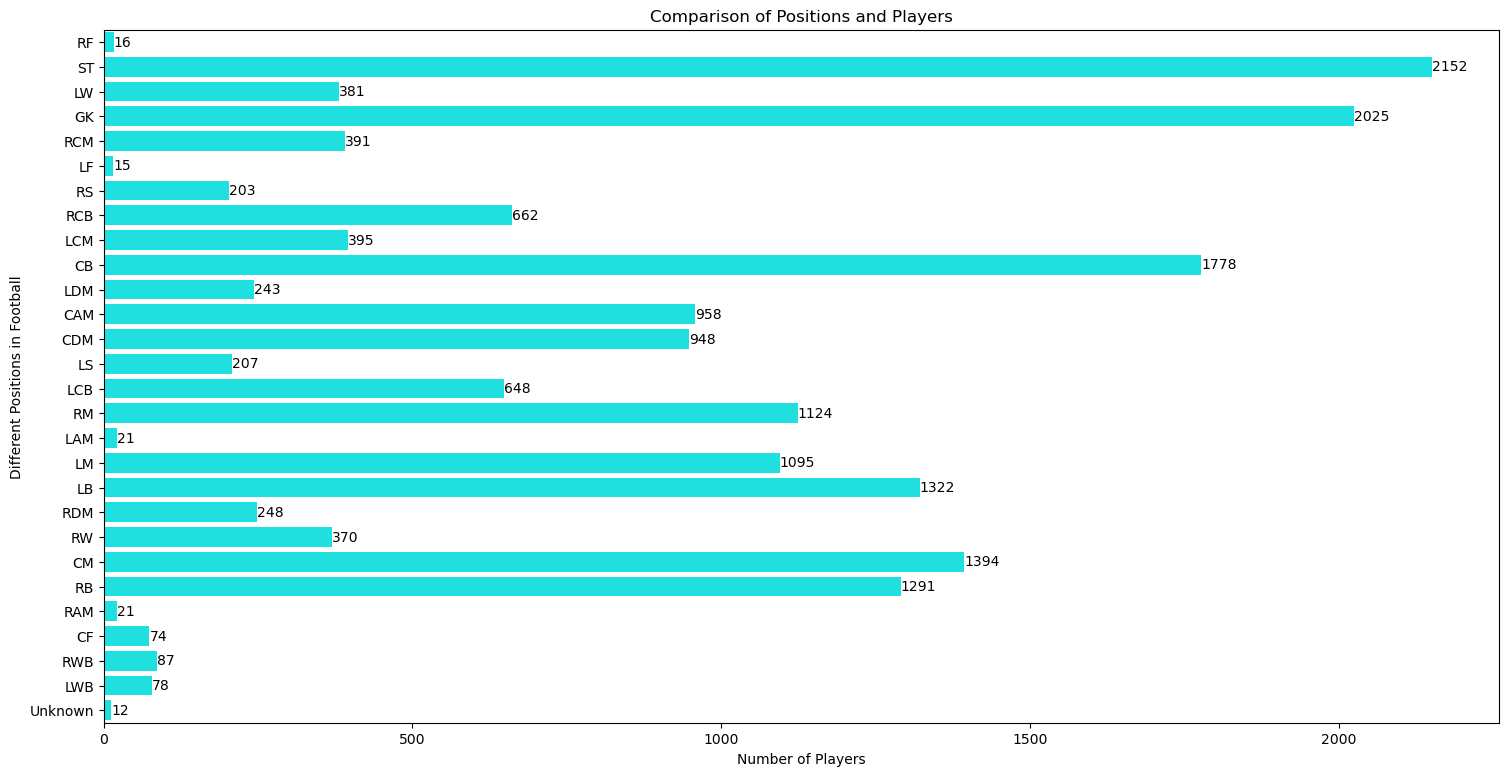

In [75]:
plt.figure(figsize = (18, 9))
p_df = sns.countplot(y = df['Position'], color = 'cyan')

p_df.set_xlabel(xlabel = 'Number of Players')
p_df.set_ylabel(ylabel = 'Different Positions in Football')
p_df.set_title(label = 'Comparison of Positions and Players')

p_df.bar_label(p_df.containers[0])

plt.show()

# 19.Players are from the club 'Juventus' and the wage is greater than 200K

In [76]:
juv_val = np.where((df['Club'] == 'Juventus') & (df['Wage'] > 200000))
juventus_df = df.loc[juv_val]

print(str(juventus_df['Club'].count()) + " players in Juventus club has Wages > 200000 ")
display(juventus_df)

25 players in Juventus club has Wages > 200000 


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,77000000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,89000000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,89000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,27000000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,27000000.0
64,191043,Alex Sandro,27,Brazil,86,86,Juventus,36500000.0,36500000.0,Left,...,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0,36500000.0
65,190483,Douglas Costa,27,Brazil,86,86,Juventus,46500000.0,46500000.0,Left,...,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0,46500000.0
70,184344,L. Bonucci,31,Italy,86,86,Juventus,30000000.0,30000000.0,Right,...,86.0,90.0,86.0,80.0,2.0,2.0,3.0,2.0,4.0,30000000.0
72,180206,M. Pjanić,28,Bosnia Herzegovina,86,86,Juventus,44000000.0,44000000.0,Right,...,86.0,75.0,74.0,70.0,7.0,7.0,13.0,7.0,8.0,44000000.0
73,177509,M. Benatia,31,Morocco,86,86,Juventus,30000000.0,30000000.0,Right,...,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,30000000.0
92,186153,W. Szczęsny,28,Poland,85,87,Juventus,32000000.0,32000000.0,Right,...,65.0,20.0,13.0,12.0,85.0,81.0,71.0,85.0,87.0,32000000.0
99,179846,S. Khedira,31,Germany,85,85,Juventus,33000000.0,33000000.0,Right,...,84.0,80.0,83.0,76.0,11.0,9.0,5.0,15.0,8.0,33000000.0


# 20. Data frame containing top 5 players by Overall rating for each unique position

In [77]:
t5_unique_p = df.groupby(by = ['Position']).apply(lambda x: x.sort_values('Overall', ascending = False).head(5))
display(t5_unique_p)

ID             Name  Age Nationality  Overall  Potential  \
Position                                                                       
CAM      17     194765     A. Griezmann   27      France       89         90   
         31     190460       C. Eriksen   26     Denmark       88         91   
         61     201942  Roberto Firmino   26      Brazil       86         87   
         66     189596        T. Müller   28     Germany       86         86   
         74     176635          M. Özil   29     Germany       86         86   
...                ...              ...  ...         ...      ...        ...   
Unknown  5018   153160        R. Raldes   37     Bolivia       70         70   
         6736   175393          J. Arce   33     Bolivia       68         68   
         7922   195905     L. Gutiérrez   33     Bolivia       67         67   
         9905   226044        R. Vargas   23     Bolivia       66         69   
         10628  216751      D. Bejarano   26     Bolivia       65         66   

                             Club       Value        Wage Preferred Foot  ...  \
Position                                                                  ...   
CAM      17       Atlético Madrid  78000000.0  78000000.0           Left  ...   
         31     Tottenham Hotspur  73500000.0  73500000.0          Right  ...   
         61             Liverpool  53000000.0  53000000.0          Right  ...   
         66     FC Bayern München  45000000.0  45000000.0          Right  ...   
         74               Arsenal  43500000.0  43500000.0           Left  ...   
...                           ...         ...         ...            ...  ...   
Unknown  5018             Unknown         0.0         0.0          Right  ...   
         6736             Unknown         0.0         0.0           Left  ...   
         7922             Unknown         0.0         0.0          Right  ...   
         9905             Unknown         0.0         0.0          Right  ...   
         10628            Unknown         0.0         0.0          Right  ...   

                Composure  Marking  StandingTackle SlidingTackle GKDiving  \
Position                                                                    
CAM      17          87.0     59.0            47.0          48.0     14.0   
         31          88.0     59.0            57.0          22.0      9.0   
         61          87.0     60.0            64.0          42.0      8.0   
         66          83.0     44.0            41.0          44.0      6.0   
         74          82.0     24.0            16.0          19.0      6.0   
...                   ...      ...             ...           ...      ...   
Unknown  5018        64.0     79.0            70.0          70.0     16.0   
         6736        67.0     12.0            34.0          33.0     16.0   
         7922        54.0     72.0            71.0          64.0     11.0   
         9905        64.0     19.0            24.0          23.0     13.0   
         10628       57.0     68.0            69.0          68.0     14.0   

               GKHandling GKKicking GKPositioning GKReflexes Release Clause  
Position                                                                     
CAM      17           8.0      14.0          13.0       14.0     78000000.0  
         31          14.0       7.0           7.0        6.0     73500000.0  
         61          11.0       9.0           6.0       10.0     53000000.0  
         66           7.0      11.0          14.0       14.0     45000000.0  
         74          14.0      10.0           6.0       14.0     43500000.0  
...                   ...       ...           ...        ...            ...  
Unknown  5018         8.0      11.0          12.0       13.0            0.0  
         6736        13.0      15.0          16.0        8.0            0.0  
         7922         7.0       8.0          12.0       12.0            0.0  
         9905        11.0      11.0           7.0        9.0     

# 21.average wage one can expect to pay for the top 5 players in every position

In [78]:
avg_wage= t5_unique_p['Wage'].groupby('Position').apply(np.mean)
print('Average Wage of top 5 players based on Overall rating for every Position : ')
print(avg_wage)

Average Wage of top 5 players based on Overall rating for every Position : 
Position
CAM        58600000.0
CB         33700000.0
CDM        41400000.0
CF         20600000.0
CM         40000000.0
GK         57900000.0
LAM        20460000.0
LB         35400000.0
LCB        40500000.0
LCM        55700000.0
LDM        35800000.0
LF         46700000.0
LM         49200000.0
LS         43500000.0
LW         76900000.0
LWB        12100000.0
RAM        15460000.0
RB         27500000.0
RCB        37800000.0
RCM        61300000.0
RDM        26600000.0
RF         36000000.0
RM         49300000.0
RS         32700000.0
RW         49600000.0
RWB        12500000.0
ST         72400000.0
Unknown           0.0
Name: Wage, dtype: float64


> Highest wage of top 5 players on overall rating is found for position: LW.
